In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [11]:
df =pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacement of blanks with 0

In [19]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [34]:
df["customerID"].duplicated().sum()

0

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [38]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

# converted 0 and 1 values of senoir citizen to yes/no  to make it easy to understand 

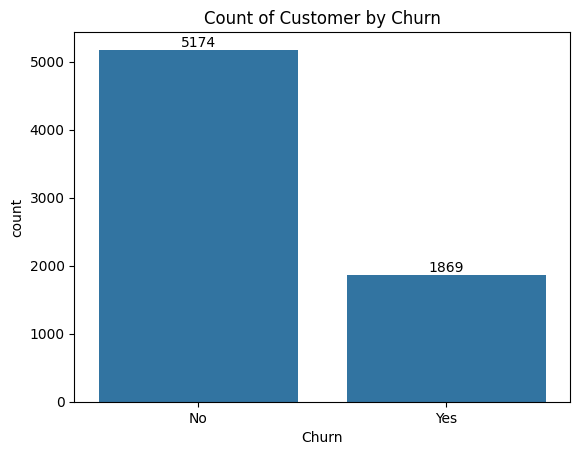

In [67]:
ax =sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()


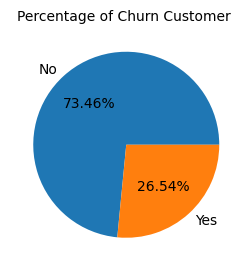

In [63]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'],labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churn Customer ",fontsize=10)
plt.show()

# For given pie chart  we conclude that 26.54% customer churn out
# Let explore the reason behind it .

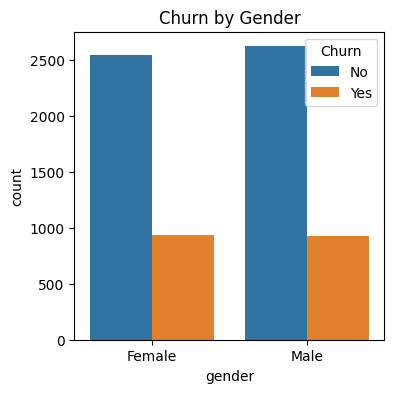

In [84]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

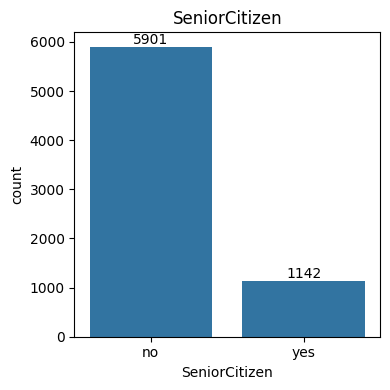

In [102]:
fig, ax = plt.subplots(figsize=(4, 4))

# Create countplot without the palette warning
sns.countplot(x="SeniorCitizen", data=df, ax=ax, color='#1f77b4')  # dark blue

# Add value labels
ax.bar_label(ax.containers[0], fontsize=10)

# Titles and layout
ax.set_title("SeniorCitizen", fontsize=12)
plt.tight_layout()
plt.show()

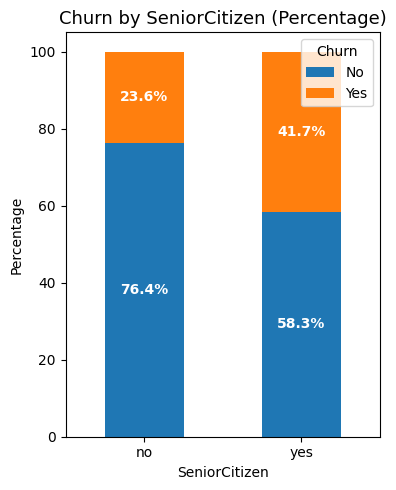

In [108]:
churn_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Define dark color palette
colors = ['#1f77b4', '#ff7f0e']  # dark blue for No, dark orange for Yes

# Plot
ax = churn_pct.plot(kind='bar', stacked=True, figsize=(4,5), color=colors)

# Add percentages on the bars
for i, total in enumerate(churn_pct.values):
    bottom = 0
    for j, value in enumerate(total):
        ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        bottom += value

# Customize plot
plt.title('Churn by SeniorCitizen (Percentage)', fontsize=13)
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Comparetively a greater percentage of people in  Senior Citizen category have churned 

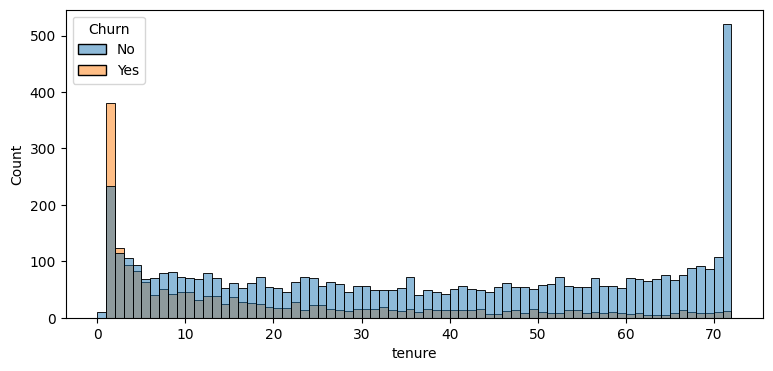

In [116]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

# People who have used our Services for a long time  have stayed and people who have used our Services 1 and 2 month  have Churend

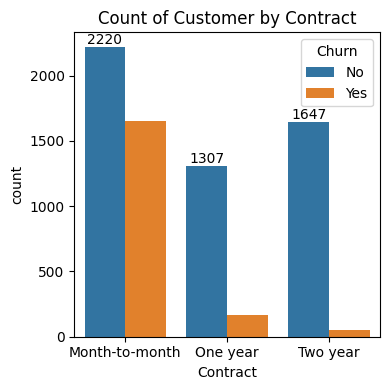

In [127]:
fig, ax = plt.subplots(figsize=(4, 4))

# Create countplot without the palette warning
sns.countplot(x="Contract", data=df,  hue="Churn")  # dark blue

# Add value labels
ax.bar_label(ax.containers[0], fontsize=10)

# Titles and layout
ax.set_title("Count of Customer by Contract", fontsize=12)
plt.tight_layout()
plt.show()

In [129]:
# People who have month to month Contract are likely to churn then from those  who have 1 or 2 years of Contract 

In [131]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

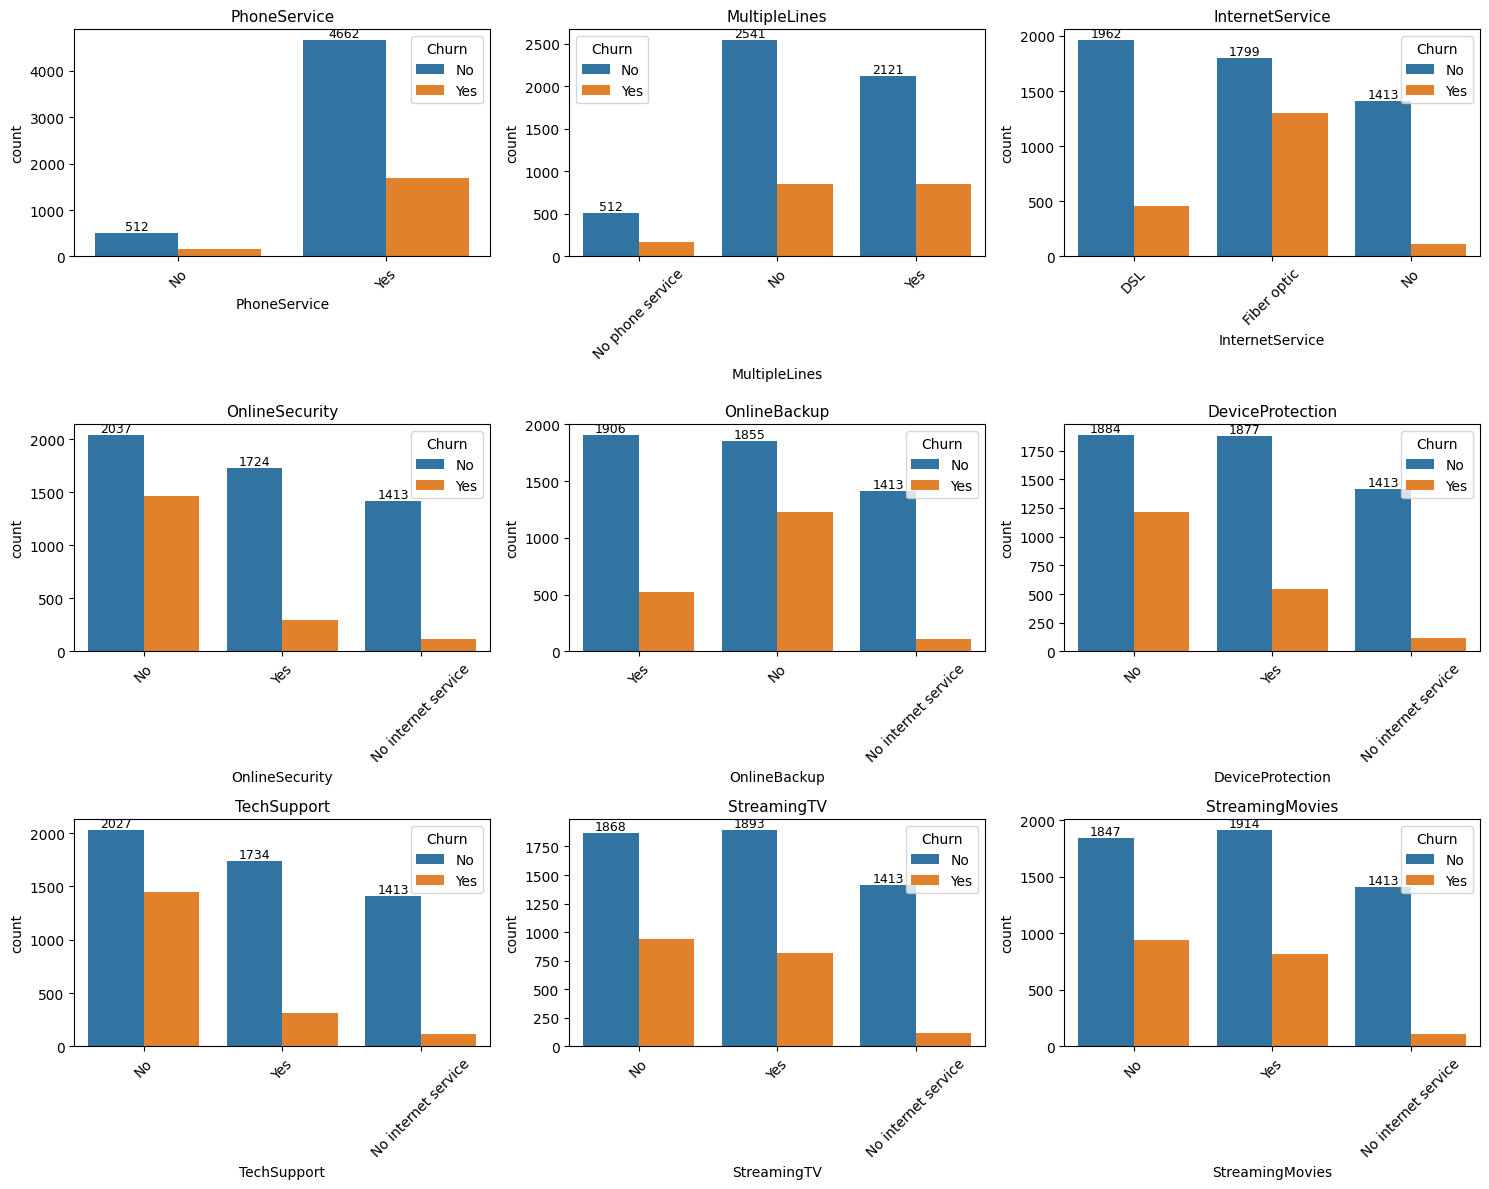

In [139]:

# List of columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Subplot layout
rows = 3
cols_per_row = 3

# Create figure
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 12))
axes = axes.flatten()

# Use a single dark color instead of palette

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue="Churn")
    axes[i].set_title(f'{col}', fontsize=11)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].bar_label(axes[i].containers[0], fontsize=9)

# Remove extra axes (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Customers who do not use services like OnlineSecurity, TechSupport, and OnlineBackup have a higher churn rate compared to those who do.
 # Core services such as PhoneService and InternetService show less variation in churn, indicating they are basic necessities.
 # Streaming services (TV and Movies) and DeviceProtection show moderate churn influence, often aligning with lack of feature usage.

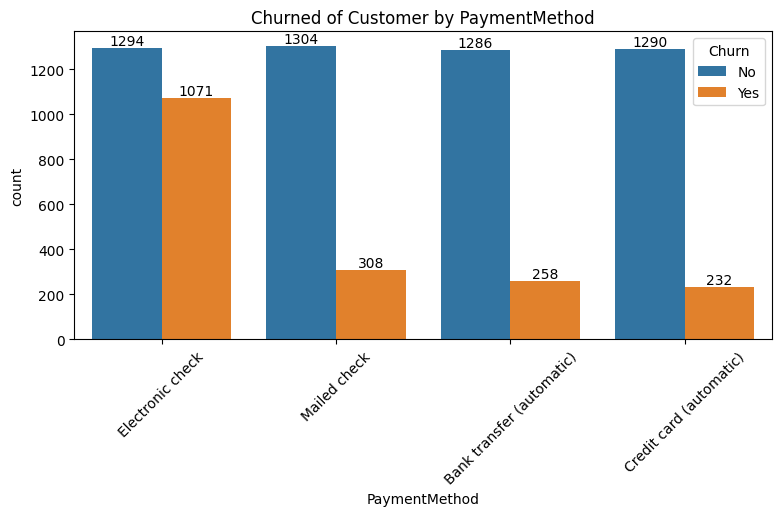

In [155]:
fig, ax = plt.subplots(figsize=(9, 4))

# Create countplot without the palette warning
sns.countplot(x="PaymentMethod", data=df,  hue="Churn")  # dark blue

# Add value labels
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers [1])
plt.xticks(rotation=45)

# Titles and layout
ax.set_title("Churned of Customer by PaymentMethod", fontsize=12)

plt.show()

# Customer likely to churned when he is using Electronic Check as a Payment Method